## xcube Data Store Framework - GeoTIFF and Cloud Optimized GeoTIFF (COG)

*Please checkout the general introduction to xcube data stores in the Jupyter Notebook [Getting Started](./1_getting_started.ipynb) before jumping into this notebook :)* 

This notebook explains how to open multi-resolution datasets (image pyramids) from a COG file using the `file` or `s3` data stores.

In [2]:
from xcube.core.new import new_cube
from xcube.core.store import find_data_store_extensions
from xcube.core.store import get_data_store_params_schema
from xcube.core.store import new_data_store
from xcube.core.store import new_data_writer

### Getting prepared

Get a data store instance. We use the local filesystem here ("file"), you can also AWS S3 ("s3") if you have a writable bucket (= root).

In [2]:
data_store = new_data_store("file", root="../../../examples/serve/demo")  # Could also use "s3"

Get available data openers and writers. 
Data opener and writer identifiers use the format `{data_type}:{format_name}:{storage_type}`.

In [3]:
data_store.get_data_opener_ids()

('dataset:netcdf:file',
 'dataset:zarr:file',
 'dataset:levels:file',
 'mldataset:levels:file',
 'dataset:geotiff:file',
 'mldataset:geotiff:file',
 'geodataframe:shapefile:file',
 'geodataframe:geojson:file')

In [4]:
data_store.list_data_ids()

['sample-cog.tif',
 'cube.nc',
 'cube-1-250-250.levels',
 'cube-5-100-200.zarr',
 'sample-geotiff.tif',
 'cube-1-250-250.zarr']

In [5]:
x=data_store.describe_data('sample-cog.tif')

In [6]:
type(x)

xcube.core.store.descriptor.MultiLevelDatasetDescriptor

In [7]:
x.to_dict()

{'data_id': 'sample-cog.tif',
 'data_type': 'mldataset',
 'bbox': [399960.0, 3890260.0, 509720.0, 4000020.0],
 'time_range': [None, None],
 'dims': {'x': 343, 'y': 343},
 'spatial_res': 320.0,
 'coords': {'x': {'name': 'x', 'dtype': 'float64', 'dims': ['x']},
  'y': {'name': 'y', 'dtype': 'float64', 'dims': ['y']},
  'spatial_ref': {'name': 'spatial_ref',
   'dtype': 'int64',
   'dims': [],
   'attrs': {'crs_wkt': 'PROJCS["WGS 84 / UTM zone 13N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORIT

### Open COG

In [8]:
ml_dataset = data_store.open_data("sample-cog.tif")

In [9]:
ml_dataset.num_levels

3

Inspect the new multi-level dataset. Check spatial chunking or `tile_size`:

In [10]:
ml_dataset.grid_mapping

class: **Coords1DGridMapping**
* is_regular: True
* is_j_axis_up: False
* is_lon_360: _unknown_
* crs: PROJCS["WGS 84 / UTM zone 13N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32613"]]
* xy_res: (320, 320)
* xy_bbox: (399960, 3890260, 509720, 4000020)
* ij_bbox: (0, 0, 343, 343)
* xy_dim_names: ('x', 'y')
* xy_var_names: ('x', 'y')
* size: (343, 343)
* tile_size: (343, 343)

In [11]:
for level in range(ml_dataset.num_levels):
    dataset_i = ml_dataset.get_dataset(level)
    display(dataset_i)

<xarray.Dataset>
Dimensions:      (x: 343, y: 343)
Coordinates:
  * x            (x) float64 4.001e+05 4.004e+05 ... 5.092e+05 5.096e+05
  * y            (y) float64 4e+06 4e+06 3.999e+06 ... 3.891e+06 3.89e+06
    spatial_ref  int64 0
Data variables:
    band_1       (y, x) uint8 dask.array<chunksize=(343, 343), meta=np.ndarray>
    band_2       (y, x) uint8 dask.array<chunksize=(343, 343), meta=np.ndarray>
    band_3       (y, x) uint8 dask.array<chunksize=(343, 343), meta=np.ndarray>
Attributes:
    source:   file:///home/tejas/bc/projects/xcube/examples/serve/demo/sample...

<xarray.Dataset>
Dimensions:      (x: 172, y: 172)
Coordinates:
  * x            (x) float64 4.003e+05 4.009e+05 ... 5.088e+05 5.094e+05
  * y            (y) float64 4e+06 3.999e+06 3.998e+06 ... 3.891e+06 3.891e+06
    spatial_ref  int64 0
Data variables:
    band_1       (y, x) uint8 dask.array<chunksize=(172, 172), meta=np.ndarray>
    band_2       (y, x) uint8 dask.array<chunksize=(172, 172), meta=np.ndarray>
    band_3       (y, x) uint8 dask.array<chunksize=(172, 172), meta=np.ndarray>
Attributes:
    source:   file:///home/tejas/bc/projects/xcube/examples/serve/demo/sample...

<xarray.Dataset>
Dimensions:      (x: 86, y: 86)
Coordinates:
  * x            (x) float64 4.006e+05 4.019e+05 ... 5.078e+05 5.091e+05
  * y            (y) float64 3.999e+06 3.998e+06 ... 3.892e+06 3.891e+06
    spatial_ref  int64 0
Data variables:
    band_1       (y, x) uint8 dask.array<chunksize=(86, 86), meta=np.ndarray>
    band_2       (y, x) uint8 dask.array<chunksize=(86, 86), meta=np.ndarray>
    band_3       (y, x) uint8 dask.array<chunksize=(86, 86), meta=np.ndarray>
Attributes:
    source:   file:///home/tejas/bc/projects/xcube/examples/serve/demo/sample...

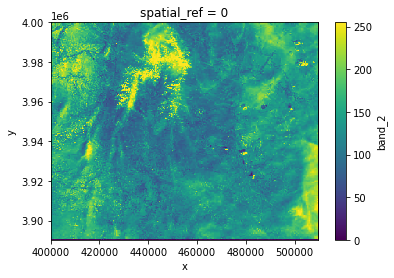

In [12]:
level = ml_dataset.get_dataset(0)
level.band_2.plot.imshow()

#Cog example for s3

In [13]:
data_store = new_data_store("s3", root="xcube-examples/",storage_options=dict(anon=True))

In [14]:
ml_s3_dataset = data_store.open_data("sample-cog.tif")

In [15]:
ml_s3_dataset.num_levels

3

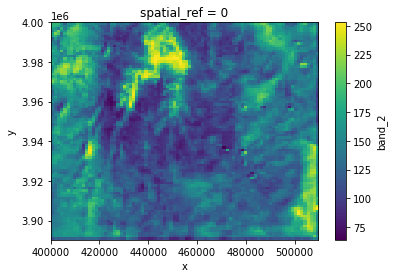

In [16]:
level = ml_s3_dataset.get_dataset(2)
level.band_2.plot.imshow()

# Test accessing a aws private s3
### Note: If the user has no access to the private bucket, there will be a AWSInvalidcredentialsError

In [8]:
aws_private_data_store = new_data_store("s3", root="cog-private-bucket-test/",storage_options=dict(anon=False))

In [9]:
ml_private_s3_dataset = aws_private_data_store.open_data("sample-cog.tif")

In [10]:
ml_private_s3_dataset.num_levels

3

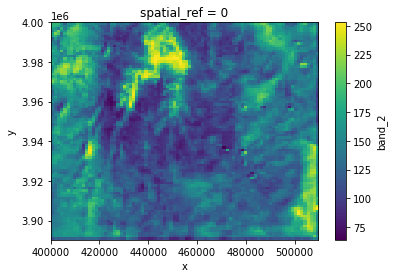

In [11]:
level = ml_private_s3_dataset.get_dataset(2)
level.band_2.plot.imshow()